In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Language Detection.csv to Language Detection.csv


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('Language Detection.csv')
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
import re
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Using Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 3, 10, 13, ...,  8,  3, 15])

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",ac*100)

Accuracy: 97.43713733075435


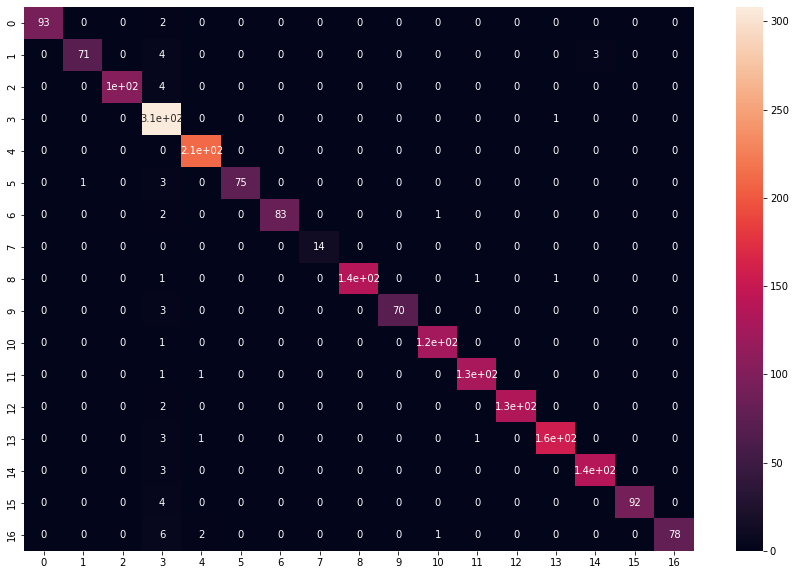

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])
predict("Hello good evening")

The langauge is in English


**Using KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 8)

In [ ]:
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = model1.predict(x_test)
y_pred

array([ 3, 10, 13, ...,  8,  9, 15])

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",ac*100)

Accuracy: 51.69245647969052


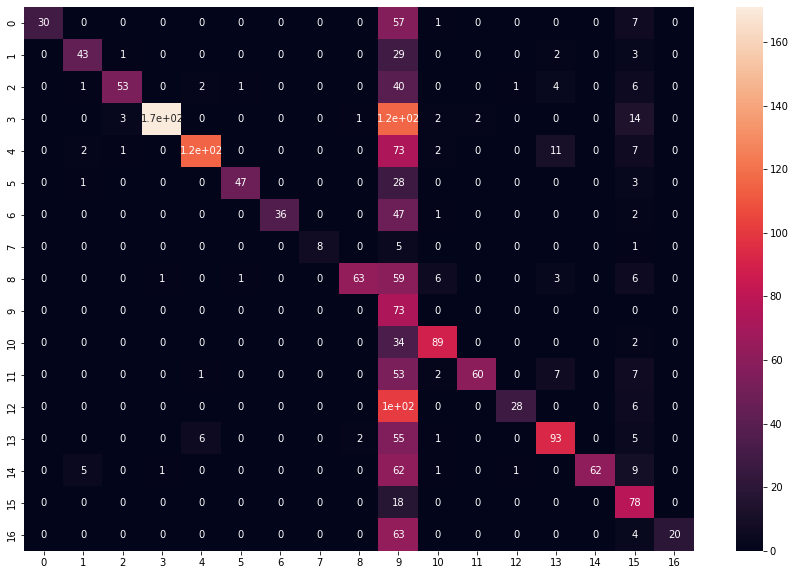

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [ ]:
model2.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model2.predict(x_test)
y_pred

array([ 3, 10, 13, ...,  8,  3, 15])

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",ac*100)

Accuracy: 95.45454545454545


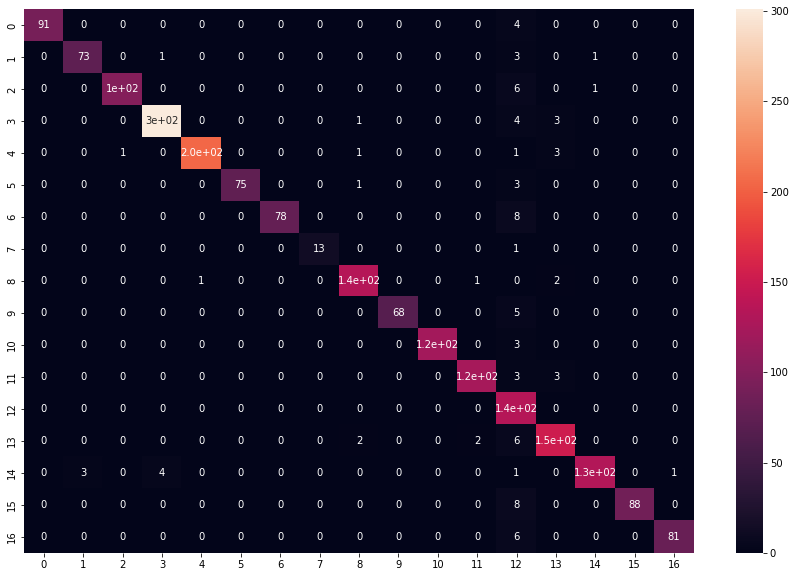

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

**Using Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model4 = SVC(kernel='linear', C=1E10)

In [ ]:
model4.fit(x_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
y_pred = model4.predict(x_test)
y_pred

array([ 3, 10, 13, ...,  8,  3, 15])

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",ac*100)

Accuracy: 90.52224371373308


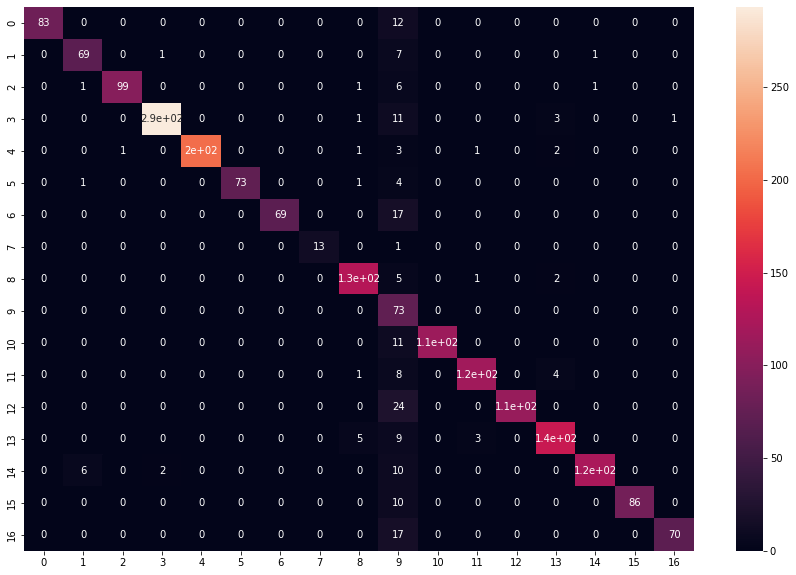

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

Out of these ml algorithms we got highest accuracy by using Naive Bayes Classifier

For Naive Bayes Classifier

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [ ]:
f1 = f1_score(y_test, y_pred, average = "weighted")

pc = precision_score(y_test, y_pred, average = "weighted")

rc = recall_score(y_test, y_pred, average = "micro")

ac = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("F1 Score is :",f1)
print("Precision Score is :",pc)
print("Recall Score is :",rc)
print("Accuracy is :",ac)

F1 Score is : 0.9746229834304533
Precision Score is : 0.976421719443855
Recall Score is : 0.9743713733075435
Accuracy is : 0.9743713733075435


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        95
           1       0.99      0.91      0.95        78
           2       1.00      0.96      0.98       108
           3       0.89      1.00      0.94       309
           4       0.98      1.00      0.99       211
           5       1.00      0.95      0.97        79
           6       1.00      0.97      0.98        86
           7       1.00      1.00      1.00        14
           8       1.00      0.98      0.99       139
           9       1.00      0.96      0.98        73
          10       0.98      0.99      0.99       125
          11       0.98      0.98      0.98       130
          12       1.00      0.99      0.99       135
          13       0.99      0.97      0.98       162
          14       0.98      0.98      0.98       141
          15       1.00      0.96      0.98        96
          16       1.00      0.90      0.95        87

    accuracy              

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])
predict("Hello good evening")

The langauge is in English
